# MI
**_Ahmed - Luisa - Myria_**

## Exercise H6.1 (Convolutional Neural Network)


### 0. Setup and loading MNIST data


In [94]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import nn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Helpful resources
# Docs: https://keras.io/api/models/model_training_apis/
# https://teaching.pages.centralesupelec.fr/deeplearning-lectures-build/00-keras-mnist.html

In [95]:
# 1. Importing the MNIST dataset and reshaping it so every image is a 784 vector
(X_train, y_train), (X_holdout, y_holdout) = mnist.load_data()

train_dataset_size = X_train.shape[0]
holdout_dataset_size = X_holdout.shape[0]

image_height = X_train.shape[1]
image_width = X_train.shape[2]

X_train = X_train.reshape(train_dataset_size, (image_height*image_width))
X_holdout = X_holdout.reshape(holdout_dataset_size, (image_height*image_width))

# 2. Change ys to be array of 1s and 0s
y_train = to_categorical(y_train, num_classes=10)
y_holdout = to_categorical(y_holdout, num_classes=10)

X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

## 1. Linear model

**A) Defining the model**

In [96]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

# 1. Define the model
num_of_nodes = 10
xi      = Input(shape=(image_height*image_width,))   # Input size (784 pixels)
xo      = Dense(num_of_nodes)(xi)                    # Defines a linear model [by default one more dimension is added for bias]
yo      = Activation('softmax')(xo)                  # Defining activation function to be softmax
model   = Model(inputs=[xi], outputs=[yo])

model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_64 (Dense)            (None, 10)                7850      
                                                                 
 activation_39 (Activation)  (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**B) Running the model**

In [97]:
# 2. Define cost/loss function and compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.5),  
              metrics=['accuracy'])

# 3. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 10,000 iterations => 17 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data\n\n")
linear_history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=17,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
          # validation_split=0.1,
         )

score = model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data


Epoch 1/17
600/600 [==============================] - 1s 1ms/step - loss: 12156.9326 - accuracy: 0.8341 - val_loss: 6314.2681 - val_accuracy: 0.8815
Epoch 2/17
600/600 [==============================] - 1s 1ms/step - loss: 7264.1558 - accuracy: 0.8654 - val_loss: 5898.5854 - val_accuracy: 0.8807
Epoch 3/17
600/600 [==============================] - 1s 1ms/step - loss: 6902.4517 - accuracy: 0.8722 - val_loss: 11515.1377 - val_accuracy: 0.8188
Epoch 4/17
600/600 [==============================] - 1s 1ms/step - loss: 6893.6797 - accuracy: 0.8746 - val_loss: 6894.7422 - val_accuracy: 0.8736
Epoch 5/17
600/600 [==============================] - 1s 1ms/step - loss: 6614.7510 - accuracy: 0.8752 - val_loss: 5367.7710 - val_accuracy: 0.8968
Epoch 6/17
600/600 [==============================] - 1s 1ms/step - loss: 6719.6035 - accuracy: 0.8763

------------
## 2. Fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer.

**A) Defining the model**

In [98]:
from tensorflow.keras import initializers

# 1. Defining the weight and bias layers
num_hidden_neurons = 1500
num_classes = 10

weights_layer_0 = Dense(
    num_hidden_neurons,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_1 = Dense(
    num_hidden_neurons,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_2 = Dense(
    num_hidden_neurons,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_output = Dense(
    num_classes,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.softmax
)

# 2. Defining how layers are stacked together to form our network
xi = Input(shape=(image_height*image_width,))
x0 = weights_layer_0(xi)
x1 = weights_layer_1(x0)
x2 = weights_layer_2(x1)
y = weights_layer_output(x2)
model = Model(inputs=[xi], outputs=[y])

model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_65 (Dense)            (None, 1500)              1177500   
                                                                 
 dense_66 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_67 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_68 (Dense)            (None, 10)                15010     
                                                                 
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________


**B) Running the model**

In [99]:
# 3. Defining loss function and optimizer hyper params
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
              metrics=['accuracy'])

# 4. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 20,000 iterations => 33 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data")
mlp_history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=33,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
         )

score = model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data
Epoch 1/33
600/600 [==============================] - 20s 33ms/step - loss: 0.2806 - accuracy: 0.9271 - val_loss: 0.1427 - val_accuracy: 0.9586
Epoch 2/33
600/600 [==============================] - 19s 31ms/step - loss: 0.1254 - accuracy: 0.9653 - val_loss: 0.1114 - val_accuracy: 0.9684
Epoch 3/33
600/600 [==============================] - 19s 32ms/step - loss: 0.0987 - accuracy: 0.9721 - val_loss: 0.1239 - val_accuracy: 0.9677
Epoch 4/33
600/600 [==============================] - 20s 33ms/step - loss: 0.0862 - accuracy: 0.9759 - val_loss: 0.1434 - val_accuracy: 0.9654
Epoch 5/33
600/600 [==============================] - 19s 32ms/step - loss: 0.0738 - accuracy: 0.9802 - val_loss: 0.1175 - val_accuracy: 0.9660
Epoch 6/33
600/600 [==============================] - 20s 33ms/step - loss: 0.0623 - accuracy: 0.9827 - val_loss: 0.1264 - val

------------------
### 3. Dropout Regularization

In [107]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout

# 0. Make sure of currect shape (flat)
X_train = X_train.reshape(train_dataset_size, (image_height*image_width))
X_holdout = X_holdout.reshape(holdout_dataset_size, (image_height*image_width))

# 1. Defining the weight and bias layers
num_hidden_neurons = 1500
num_classes = 10

weights_layer_0 = Dense(
    num_hidden_neurons,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_1 = Dense(
    num_hidden_neurons,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_2 = Dense(
    num_hidden_neurons,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_output = Dense(
    num_classes,
    kernel_initializer = initializers.RandomNormal(mean=0.0, stddev=0.01),
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.softmax
)

# 2. Defining how layers are stacked together to form our network
xi = Input(shape=(image_height*image_width,))
x0 = Dropout(0.5)(weights_layer_0(xi))
x1 = Dropout(0.5)(weights_layer_1(x0))
x2 = Dropout(0.5)(weights_layer_2(x1))
y = weights_layer_output(x2)
model = Model(inputs=[xi], outputs=[y])

# 3. Defining loss function and optimizer hyper params
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
              metrics=['accuracy'])

# 4. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 20,000 iterations => 33 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data\n")
mlp_dropout_history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=33,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
         )

score = model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data

Epoch 1/33
600/600 [==============================] - 28s 46ms/step - loss: 0.4961 - accuracy: 0.8679 - val_loss: 0.2010 - val_accuracy: 0.9476
Epoch 2/33
600/600 [==============================] - 27s 45ms/step - loss: 0.4124 - accuracy: 0.9001 - val_loss: 0.2323 - val_accuracy: 0.9444
Epoch 3/33
600/600 [==============================] - 27s 45ms/step - loss: 0.4438 - accuracy: 0.9001 - val_loss: 0.2229 - val_accuracy: 0.9467
Epoch 4/33
600/600 [==============================] - 30s 50ms/step - loss: 0.4400 - accuracy: 0.9017 - val_loss: 0.2217 - val_accuracy: 0.9542
Epoch 5/33
600/600 [==============================] - 29s 48ms/step - loss: 0.4374 - accuracy: 0.9045 - val_loss: 0.2404 - val_accuracy: 0.9529
Epoch 6/33
600/600 [==============================] - 27s 45ms/step - loss: 0.4612 - accuracy: 0.9015 - val_loss: 0.2101 - va

------------------
## 4. CNN (ahaaa)

**A) Defining the model**

In [101]:
# 1. Reshaping the input to be HxW matrix again
X_train = X_train.reshape(train_dataset_size, image_height, image_width)
X_holdout = X_holdout.reshape(holdout_dataset_size, image_height, image_width)

In [102]:
# 2. Defining the CNN layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D

xi = Input(shape=(image_height, image_width, 1))
x0 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same')(xi)
h0 = Activation('relu')(x0)
x1 = MaxPooling2D(pool_size=2, strides=2)(h0)
x2 = Conv2D(filters=64, kernel_size=5, strides=1, padding='same')(x1)
h2 = Activation('relu')(x2)
x3 = MaxPooling2D(pool_size=2, strides=2)(h2)
x = Flatten()(x3)
y = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[xi], outputs=[y])
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 activation_40 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 activation_41 (Activation)  (None, 14, 14, 64)        0         
                                                          

**B) Running the model**

In [103]:
# 3. Defining the optimizer and loss function
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
              metrics=['accuracy'])

# 4. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 20,000 iterations => 33 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data")
cnn_history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=33,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
         )

score = model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data
Epoch 1/33
600/600 [==============================] - 39s 65ms/step - loss: 0.5425 - accuracy: 0.9348 - val_loss: 0.0708 - val_accuracy: 0.9774
Epoch 2/33
600/600 [==============================] - 39s 65ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0496 - val_accuracy: 0.9829
Epoch 3/33
600/600 [==============================] - 39s 65ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0532 - val_accuracy: 0.9828
Epoch 4/33
600/600 [==============================] - 38s 63ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 5/33
600/600 [==============================] - 40s 66ms/step - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.0531 - val_accuracy: 0.9862
Epoch 6/33
600/600 [==============================] - 38s 63ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0552 - val

------------------
### 5. Comparison between the different approaches

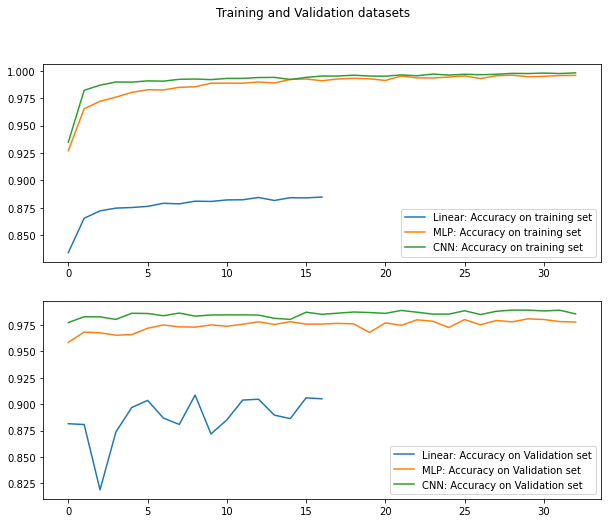

In [105]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(10, 8))
fig.suptitle('Training and Validation datasets')

# Plot training
axs[0].plot(linear_history.history['accuracy'], label="Linear: Accuracy on training set")
axs[0].plot(mlp_history.history['accuracy'], label="MLP: Accuracy on training set")
axs[0].plot(mlp_dropout_history.history['accuracy'], label="MLP Dropout: Accuracy on training set")
axs[0].plot(cnn_history.history['accuracy'], label="CNN: Accuracy on training set")

# Plot validation
axs[1].plot(linear_history.history['val_accuracy'], label="Linear: Accuracy on Validation set")
axs[1].plot(mlp_history.history['val_accuracy'], label="MLP: Accuracy on Validation set")
axs[1].plot(mlp_dropout_history.history['val_accuracy'], label="MLP Dropout: Accuracy on Validation set")
axs[1].plot(cnn_history.history['val_accuracy'], label="CNN: Accuracy on Validation set")


# Cosmetic stuff
axs[0].legend()
axs[1].legend()
plt.show()


------------------
### 6. Using the model to predict some images (just for fun)

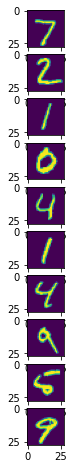

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [145]:
# Trying out that CNN

# a. Loading some images
images_flat = X_holdout.reshape(holdout_dataset_size, (image_height*image_width))[0:10]
images = X_holdout.reshape(holdout_dataset_size, image_height,image_width)[0:10]

# b. plotting the imags
fig, axs = plt.subplots(10, figsize=(10, 8))
for i, image in enumerate(images):
    axs[i].imshow(image)
plt.show()

# c. Using the model to do prediction on this set of images
results = model(images_flat, training=False)

# d. Transforming results to something we can read (not probabilties)
human_readable_results = [np.argmax(res) for res in results.numpy()]
human_readable_results